First, we need to load all of our libraries we will use for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import data_loader
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')

1. Load Data with the provided code

In [2]:
df = data_loader.load_train_data('adult.data', valid_rate=0.1, is_df=True)
df_train = df[0]
df_validation = df[1]
df_train.rename(columns = {0:'age',1:'workclass',2:'fnlwgt', 3:'education', 4:'education.num', 5:'marital.status',6:'occupation' ,7:'relationship', 8:'race' ,9:'sex', 10:'capital-gain', 11:'capital.loss',12:'hours.per.week', 13:'native.country',14:'income'},inplace=True)
df_validation.rename(columns = {0:'age',1:'workclass',2:'fnlwgt', 3:'education', 4:'education.num', 5:'marital.status',6:'occupation' ,7:'relationship', 8:'race' ,9:'sex', 10:'capital-gain', 11:'capital.loss',12:'hours.per.week', 13:'native.country',14:'income'},inplace=True)


In [3]:
df_test = data_loader.load_test_data('adult.test', is_df=True)
df_test.rename(columns = {0:'age',1:'workclass',2:'fnlwgt', 3:'education', 4:'education.num', 5:'marital.status',6:'occupation' ,7:'relationship', 8:'race' ,9:'sex', 10:'capital-gain', 11:'capital.loss',12:'hours.per.week', 13:'native.country',14:'income'},inplace=True)

In [4]:

df_train['income']=df_train['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})
df_train["marital.status"] = df_train["marital.status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
df_train["marital.status"] = df_train["marital.status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')

df_validation['income']=df_validation['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})
df_validation["marital.status"] = df_validation["marital.status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
df_validation["marital.status"] = df_validation["marital.status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')


df_test['income']=df_test['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})
df_test["marital.status"] = df_test["marital.status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
df_test["marital.status"] = df_test["marital.status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')



2. Analyze Data

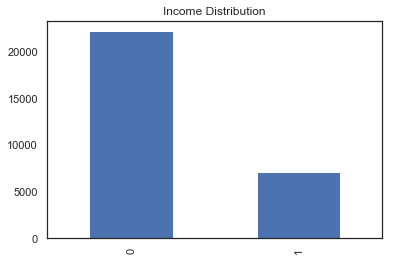

In [5]:
ax = df_train['income'].value_counts().plot(kind="bar")
plt.title("Income Distribution")
plt.show()

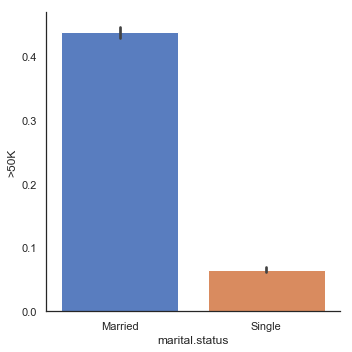

In [7]:
g  = sns.catplot(x="marital.status",y="income",data=df_train,kind="bar",height = 5,palette = "muted")
g = g.set_ylabels(">50K")

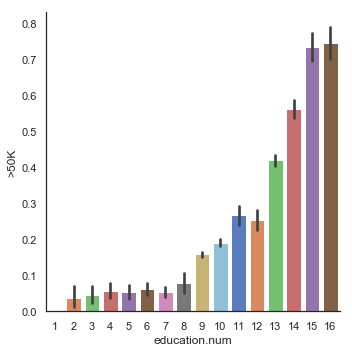

In [9]:
g = sns.catplot(x="education.num",y="income",data=df_train,kind="bar",height = 5,palette = "muted")
g = g.set_ylabels(">50K")

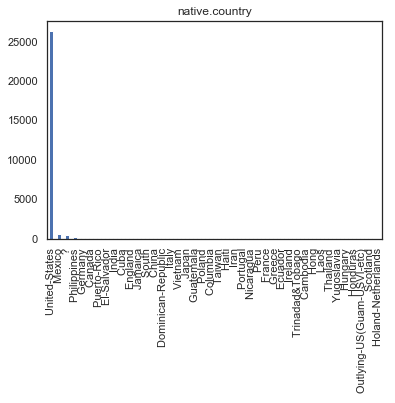

In [80]:
df_train['native.country'].value_counts().plot(kind="bar")
plt.title("native.country")
plt.show()

3. Feature Engineering and Model Comparison

In [5]:
df_train["race"] = df_train["race"].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4})
df_train["sex"] = df_train["sex"].map({" Male": 0, " Female":1})
df_train["marital.status"] = df_train["marital.status"].map({"Married":1, "Single":0})
df_train["marital.status"] = df_train["marital.status"].astype(int)
df_train["workclass"] = df_train["workclass"].map({ ' ?':0, ' Federal-gov':1, ' Local-gov':2, ' Never-worked':3, ' Private':4, ' Self-emp-inc':5, ' Self-emp-not-inc':6, ' State-gov':7, ' Without-pay':8})
df_train["workclass"] = df_train["workclass"].astype(int)
df_train["occupation"] = df_train["occupation"].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)
df_validation["race"] = df_validation["race"].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4})
df_validation["sex"] = df_validation["sex"].map({" Male": 0, " Female":1})
df_validation["marital.status"] = df_validation["marital.status"].map({"Married":1, "Single":0})
df_validation["marital.status"] = df_validation["marital.status"].astype(int)
df_validation["workclass"] = df_validation["workclass"].map({ ' ?':0, ' Federal-gov':1, ' Local-gov':2, ' Never-worked':3, ' Private':4, ' Self-emp-inc':5, ' Self-emp-not-inc':6, ' State-gov':7, ' Without-pay':8})
df_validation["workclass"] = df_validation["workclass"].astype(int)
df_validation["occupation"] = df_validation["occupation"].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                        ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                        ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                        ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                        ' Protective-serv': 14}).astype(int)
df_train.drop(labels=["education","relationship","native.country"], axis = 1, inplace = True)
df_validation.drop(labels=["education","relationship","native.country"], axis = 1, inplace = True)

In [6]:
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train = df_train.values[:,0:7]
X_validation = df_validation.values[:,0:7] 
Y_train = df_train.values[:,7]
Y_validation= df_validation.values[:,7]
num_trees = 100
max_features = 3

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC(gamma='scale')))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    string = "%s:  %f" % (name, cv_results.mean())
    print(string)

KNN:  0.665087
DecisionTree:  0.717551
GaussianNB:  0.669418


KeyboardInterrupt: 

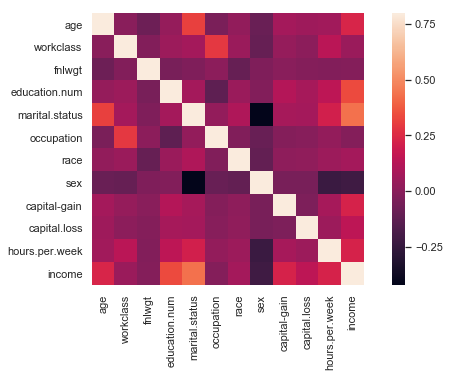

In [46]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

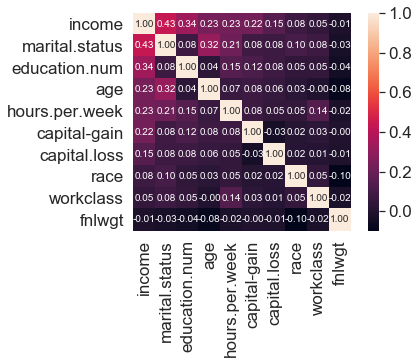

In [47]:
cols = corrmat.nlargest(10, 'income')['income'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.55)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df_test["race"] = df_test["race"].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4})
df_test["marital.status"] = df_test["marital.status"].map({"Married":1, "Single":0})
df_test["marital.status"] = df_test["marital.status"].astype(int)
df_train.drop(labels=["occupation","sex","fnlwgt","workclass"], axis = 1, inplace = True)
df_validation.drop(labels=["occupation","sex","fnlwgt","workclass"], axis = 1, inplace = True)
df_test.drop(labels=["education","occupation","relationship","native.country","sex","fnlwgt","workclass"], axis = 1, inplace = True)
X_train = df_train.values[:,0:7]
X_validation = df_validation.values[:,0:7] 
Y_train = df_train.values[:,7]
Y_validation= df_validation.values[:,7]

In [57]:
classifier = SVC(gamma='scale')
classifier.fit(X_train, Y_train)
score = classifier.score(X_validation, Y_validation)
print(score)

KeyboardInterrupt: 

In [58]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
score = classifier.score(X_validation, Y_validation)
print(score)

0.8016019716574245


In [59]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)
score = classifier.score(X_validation, Y_validation)
print(score)

0.8342575477510783


In [60]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
score = classifier.score(X_validation, Y_validation)
print(score)

0.8280961182994455


In [64]:
num_trees = 100
max_features = 3
classifier = RandomForestClassifier(n_estimators=100, max_features=3)
classifier.fit(X_train, Y_train)
score = classifier.score(X_validation, Y_validation)
print(score)

0.8407270486752927


4. Algorithm Tuning

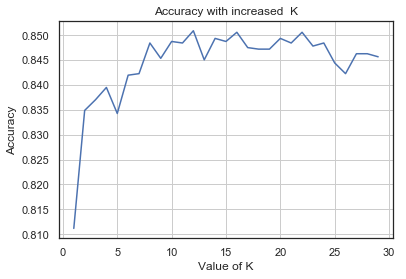

In [61]:
#Calculate the accuracy with increasing the number of K
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_validation, Y_validation))

sns.lineplot(range(1,30), scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title("Accuracy with increased  K")
plt.grid(True)
plt.show()

In [62]:
print("The best K value in this dataset is {0} - Accuracy = {1}".format(scores.index(max(scores)), max(scores)))

The best K value in this dataset is 11 - Accuracy = 0.8508934072704868


In [8]:
X_test = df_test.values[:,0:7] 
Y_test = df_test.values[:,7]
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)
print(score)

0.8484122596892083


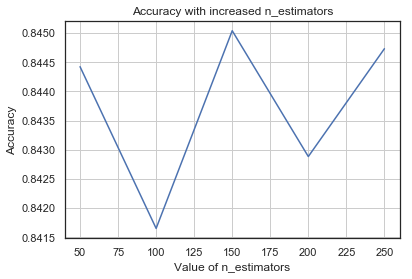

In [10]:
scores = []
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5,6,7])
for i in n_estimators:
    classifier = RandomForestClassifier(n_estimators=i)
    classifier.fit(X_train, Y_train)
    scores.append(classifier.score(X_validation, Y_validation))

sns.lineplot(n_estimators, scores)
plt.xlabel('Value of n_estimators')
plt.ylabel('Accuracy')
plt.title("Accuracy with increased n_estimators")
plt.grid(True)
plt.show()

In [11]:
print("The best n_estimators value in this dataset is {0} - Accuracy = {1}".format(scores.index(max(scores)), max(scores)))

The best n_estimators value in this dataset is 2 - Accuracy = 0.8450400492914356


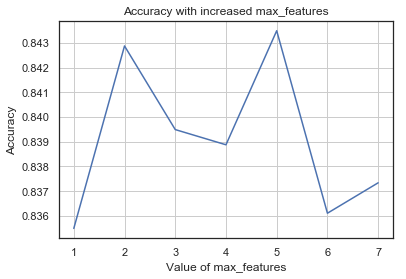

In [12]:
scores = []
for i in max_features:
    classifier = RandomForestClassifier(max_features=i)
    classifier.fit(X_train, Y_train)
    scores.append(classifier.score(X_validation, Y_validation))

sns.lineplot(max_features, scores)
plt.xlabel('Value of max_features')
plt.ylabel('Accuracy')
plt.title("Accuracy with increased max_features")
plt.grid(True)
plt.show()

In [13]:
print("The best max_features value in this dataset is {0} - Accuracy = {1}".format(scores.index(max(scores)), max(scores)))

The best max_features value in this dataset is 4 - Accuracy = 0.8434996919285275


In [14]:
random_forest = RandomForestClassifier(n_estimators=150,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_test)
print("Accuracy: %s" % (accuracy_score(Y_test, predictions)))

Accuracy: 0.8427615011362939


In [72]:
classifier = SVC(kernel="linear", gamma='scale',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_validation)
acc_score = accuracy_score(Y_validation, y_pred) 
print("Linear ACC: %s" % acc_score)

Linear ACC: 0.7735674676524954


In [14]:
classifier = SVC(kernel="rbf", gamma='scale',random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_validation)
acc_score = accuracy_score(Y_validation, y_pred) 
print("rbf ACC: %s" % acc_score)

rbf ACC: 0.8296364756623537


In [9]:
classifier = SVC(kernel='sigmoid', gamma='scale', random_state=1)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_validation)
acc_score = accuracy_score(Y_validation, y_pred) 
print("sigmoid ACC: %s" % acc_score)

sigmoid ACC: 0.7578558225508318


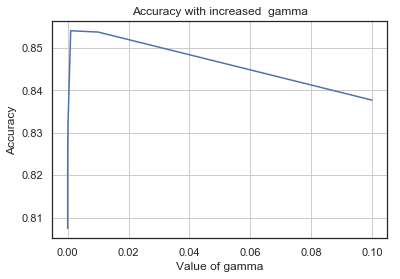

In [17]:
scores = []
gamma_range = [1.0e-08,1.0e-07,1.0e-06,1.0e-05,1.0e-04,1.0e-03,1.0e-02,1.0e-01]
for i in gamma_range:
    classifier = SVC(kernel="rbf", gamma=i)
    classifier.fit(X_train, Y_train)
    scores.append(classifier.score(X_validation, Y_validation))

sns.lineplot(gamma_range, scores)
plt.xlabel('Value of gamma')
plt.ylabel('Accuracy')
plt.title("Accuracy with increased  gamma")
plt.grid(True)
plt.show()

In [18]:
print("The best gamma value in this dataset is {0} - Accuracy = {1}".format(scores.index(max(scores)), max(scores)))

The best gamma value in this dataset is 5 - Accuracy = 0.8539741219963032


In [15]:
classifier = SVC(kernel="rbf", gamma=1.0e-03)
classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)
print(score)

0.8572569252502917
